### Basic embedding stuff (delete later)

In [1]:
%load_ext autoreload
%autoreload 2

# imports
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src"))) # hack for importing src/


### create an embedding db

In [2]:
from llm import generate_embedding

def read_file(file_name):
    return open(os.path.join(os.getcwd(), "..", "src", "plugin", "api", "routes", file_name)).read()

def create_db_entry(file_name):
    contents = read_file(file_name)
    return {
        "file_name": file_name,
        "contents": contents,
        "embedding": generate_embedding(contents)
    }

file_names = os.listdir(os.path.join(os.getcwd(), "..", "src", "plugin", "api", "routes"))

embedding_db = [
    create_db_entry(file_name) for file_name in file_names
]

In [3]:
# cosine similarity from openai
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def cosine_similarity_matrix(terms, targets):
    similarity_matrix = []
    for i, term in enumerate(terms):
        row = []
        for j, target in enumerate(targets):
            row.append(cosine_similarity(term, target))
        similarity_matrix.append(row)
    return similarity_matrix

def draw_heatmap(matrix, x_tick_labels, y_tick_labels, title):
    # Create the heatmap using the similarity_matrix
    fig, ax = plt.subplots()
    cax = ax.imshow(matrix, cmap='viridis', interpolation='nearest')

    # Set the colorbar
    cbar = fig.colorbar(cax)

    # Set the tick labels and positions for x-axis and y-axis
    labels = [ embedding["file_name"] for embedding in embedding_db ]
    tick_positions = list(range(len(labels)))

    ax.set_xticks(list(range(len(x_tick_labels))))
    ax.set_xticklabels(x_tick_labels)

    ax.set_yticks(list(range(len(y_tick_labels))))
    ax.set_yticklabels(y_tick_labels)

    # rotate the tick labels and set their alignment:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Set the title
    ax.set_title(title)

    # Show the plot
    plt.show()

# file_names = [ embedding["file_name"] for embedding in embedding_db ]
# matrix = cosine_similarity_matrix(embeddings, embeddings)
# draw_heatmap(matrix, file_names, file_names, "Cosine Similarity Matrix of Plugin API Route Code Embeddings")

In [4]:
# create embeddings for search terms

search_terms = [
    "http requests",
    "related to tasks",
    "manage tasks",
    "sends web requests",
    "creates embeddings",
    "invoke zsh",
    "invoke shell",
    "execute commands",
    "human readable time",
    "numbers"
]

search_term_embeddings = [
    generate_embedding(search_term) for search_term in search_terms
]

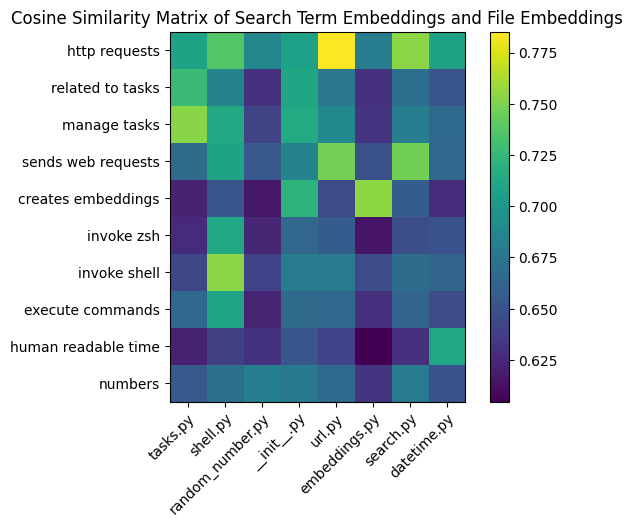

In [5]:
file_embeddings = [ embedding["embedding"] for embedding in embedding_db ]

matrix = cosine_similarity_matrix(search_term_embeddings, file_embeddings)

draw_heatmap(matrix, file_names, search_terms, "Cosine Similarity Matrix of Search Term Embeddings and File Embeddings")

In [6]:
# Get the index of the maximum value in each row
top_indices = np.argmax(matrix, axis=1)

k=3

# Get the indices that would sort each row
sorted_indices = np.argsort(matrix, axis=1)[:, -k:]

# Get the file names corresponding to each top index
top_files = [[file_names[i] for i in row[::-1]] for row in sorted_indices]

# Print the top file for each search term
for search_term, top_file in zip(search_terms, top_files):
    print(f"'{search_term}': {top_file}")

'http requests': ['url.py', 'search.py', 'shell.py']
'related to tasks': ['tasks.py', '__init__.py', 'shell.py']
'manage tasks': ['tasks.py', '__init__.py', 'shell.py']
'sends web requests': ['url.py', 'search.py', 'shell.py']
'creates embeddings': ['embeddings.py', '__init__.py', 'search.py']
'invoke zsh': ['shell.py', '__init__.py', 'url.py']
'invoke shell': ['shell.py', 'url.py', '__init__.py']
'execute commands': ['shell.py', '__init__.py', 'url.py']
'human readable time': ['datetime.py', '__init__.py', 'url.py']
'numbers': ['random_number.py', 'search.py', '__init__.py']
